# Machine learning. Practical task 1.

In [23]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [24]:
m = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

In [25]:
titles=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship', 'race', 'sex','capital-gain','capital-loss','hours-per-week','native-country','class']

In [26]:
m.columns = titles

### 1. How many males and females are there?

In [22]:
m['sex'].value_counts()

 Male      21789
 Female    10771
Name: sex, dtype: int64

### 2. What is the mean male age?

In [23]:
m.groupby('sex').age.mean().iloc[1]

39.433567396392675

### 3. What is the proportion of the US citizens?

In [24]:
(m['native-country'].value_counts(' ')*100).iloc[0]

89.58538083538083

### 4. Plot the distribution of people’s education as a bar plot.

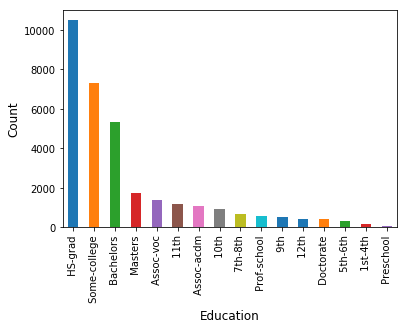

In [50]:
plt.pyplot.xlabel('Education', fontsize=12)
plt.pyplot.ylabel('Count', fontsize=12)
m.education.value_counts().plot.bar()

### 5. What is the mean and standard deviation of the ”final weight” for divorced people?

In [66]:
m.groupby('marital-status').std().iloc[2,1]

103097.54301118165

In [65]:
m.groupby('marital-status').mean().iloc[0,1]

185802.79045689848

### 6. Is it true that the people who receive over 50k are mostly highly educated?

In [158]:
sum_less = 0
sum_b = 0
educ = m[m['class'] != ' >50K' ].education.value_counts().index;
for i in range (0,len(educ)):
    if educ[i] in [' Bachelors', ' Masters', ' Doctorate']:
        sum_less += m[m['class'] != ' >50K' ].education.value_counts()[i]
educ = m[m['class'] == ' >50K' ].education.value_counts().index;
for i in range (0,len(educ)):
    if educ[i] in [' Bachelors', ' Masters', ' Doctorate']:
        sum_b += m[m['class'] == ' >50K' ].education.value_counts()[i]
print('yes') if sum_b/m[m['class'] == ' >50K' ].education.count() > sum_less/m[m['class'] != ' >50K' ].education.count() else print('no')


yes


### 7. What is the maximum male and female age for each race?

In [161]:
m.groupby(['race','sex']).age.max()

race                 sex    
 Amer-Indian-Eskimo   Female    80
                      Male      82
 Asian-Pac-Islander   Female    75
                      Male      90
 Black                Female    90
                      Male      90
 Other                Female    74
                      Male      77
 White                Female    90
                      Male      90
Name: age, dtype: int64

### 8. The people from which countries work as farmers/fishers?

In [168]:
m[m['occupation'] == ' Farming-fishing']['native-country'].unique()

array([' United-States', ' Cambodia', ' Poland', ' Guatemala', ' Mexico',
       ' England', ' ?', ' Philippines', ' Italy', ' Puerto-Rico',
       ' Vietnam', ' Germany', ' Japan', ' Canada', ' Yugoslavia',
       ' Cuba', ' Portugal', ' El-Salvador', ' Hong', ' Ireland',
       ' France'], dtype=object)

### 9. Consider the ratio of the number of 1) male bachelors to male masters, and 2) female bachelors to female masters. Which one is higher?

In [210]:
male_bachelors = m.groupby(['sex']).get_group(' Male').education.value_counts()[' Bachelors']
male_masters = m.groupby(['sex']).get_group(' Male').education.value_counts()[' Masters']

female_bachelors = m.groupby(['sex']).get_group(' Female').education.value_counts()[' Bachelors']
female_masters = m.groupby(['sex']).get_group(' Female').education.value_counts()[' Masters']

print('male bachelors to male masters is higher') if male_bachelors/male_masters > female_bachelors/female_masters else print('female bachelors to female masters is higher') 

male bachelors to male masters is higher


### 10. What is the largest number of hours a person works a week? How many people who work this number of hours are there? What is their income?

In [212]:
m['hours-per-week'].max()

99

In [226]:
m[m['hours-per-week'] == 99].count()[0]

85

In [229]:
m[m['hours-per-week'] == 99]['capital-gain']

934          0
1171         0
1886         0
3577         0
4085         0
4307         0
4440         0
5375         0
5431      2354
6617         0
6897         0
8071         0
8392         0
8653         0
8795     15024
9810         0
9830         0
10142        0
10265        0
10467        0
10985        0
11832        0
12208        0
12624        0
12787        0
13557        0
13579        0
13616     4416
13857        0
14592        0
         ...  
23225        0
23397        0
23648    15024
23829        0
24482        0
25353        0
25712        0
25805        0
25830        0
25985        0
26249        0
26595        0
26637        0
26857        0
27221        0
27763        0
27808        0
28111        0
29186        0
29750        0
29988     4386
30035    15024
30609        0
30753        0
30765        0
30991        0
31680        0
31698        0
32468        0
32530        0
Name: capital-gain, Length: 85, dtype: int64